In [1]:
import h5py
import numpy as np
from sourcesep.utils.config import load_config
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(font_scale=0.8)
%config InlineBackend.figure_format='retina'

paths = load_config(dataset_key='all')
file_path = paths['root'] / 'sims' / '2023-03-07_bleaching.h5'

Paths are for dataset tagged: all


In [2]:
f = h5py.File(file_path, "r")
print(f.keys())

<KeysViewHDF5 ['A', 'B', 'H_dox', 'H_ox', 'L_arr', 'M', 'N', 'O', 'T_arr']>


In [3]:
# read data into memory
t = f['T_arr'][:]
l = f['L_arr'][:]
A = f['A'][:]
O = f['O'][:]

print(f'O shape = {O.shape}')
print(f'A shape = {A.shape}')
print(f't shape = {t.shape}')
print(f'l shape = {l.shape}')

O shape = (144000, 5, 60)
A shape = (144000, 3)
t shape = (144000,)
l shape = (60,)


In [4]:
channel = np.argmin(np.abs(l - 529))
stim_laser = 2
print(channel)

25


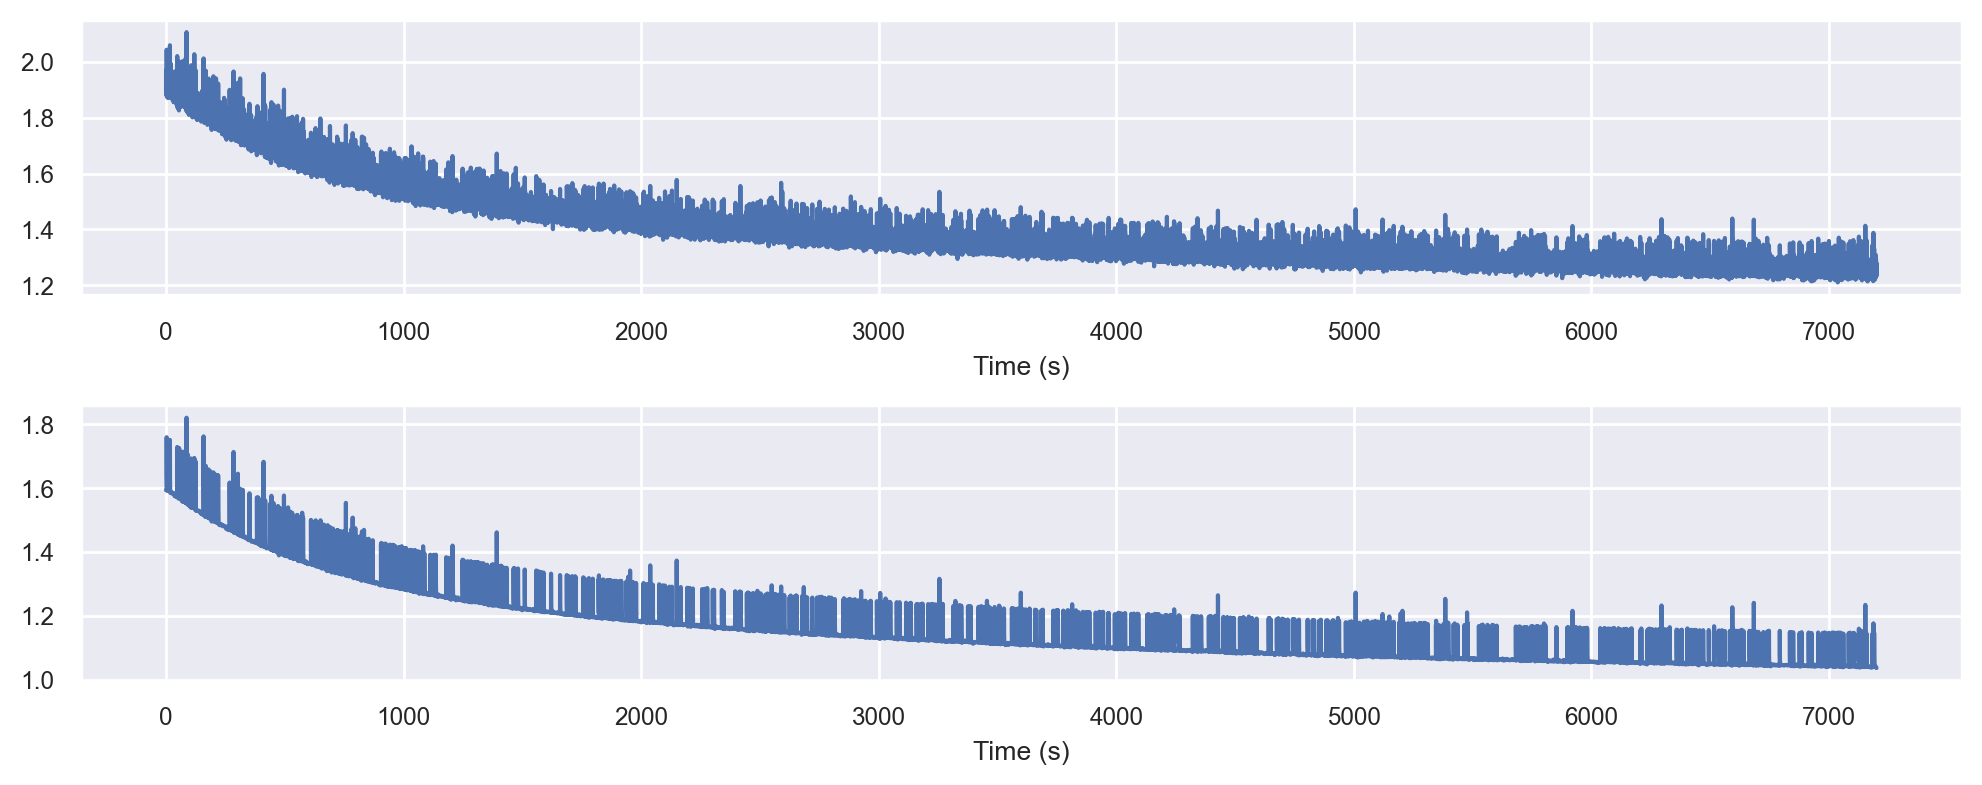

In [5]:
fig, ax = plt.subplots(2,1, figsize=(10,4))
ax[0].plot(t, O[:,stim_laser,channel], label='Observation')
ax[1].plot(t, A[:,0], label='Activity ground truth') # for the 0th indicator
ax[0].set(xlabel='Time (s)')
ax[1].set(xlabel='Time (s)')
plt.tight_layout()
plt.show()

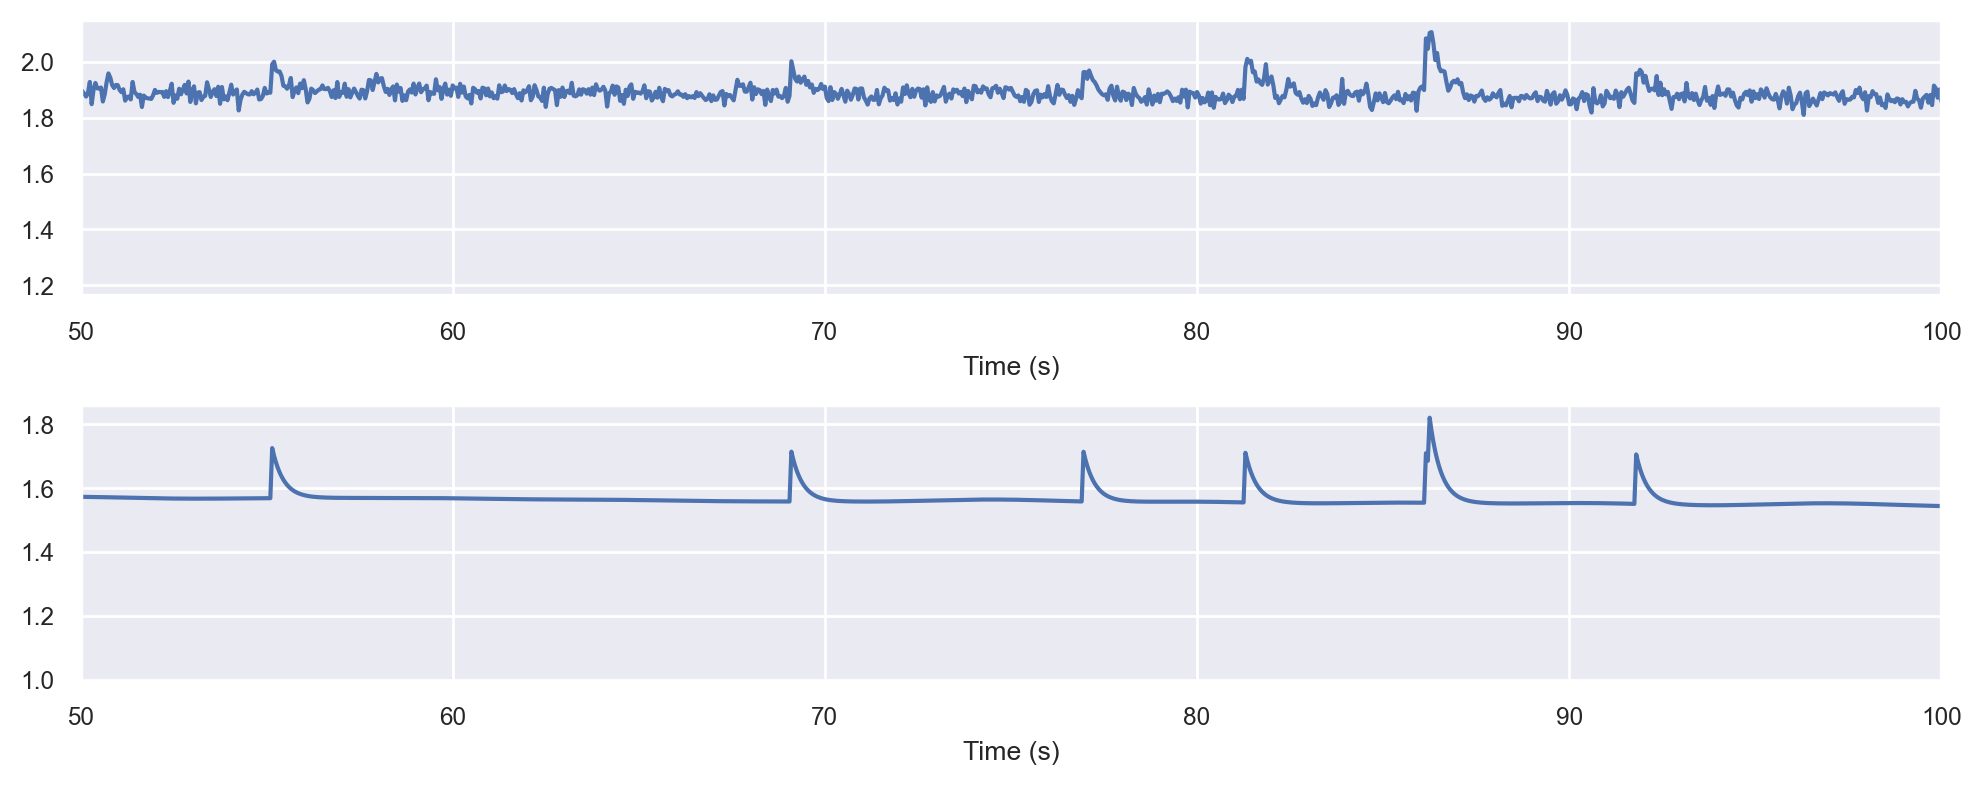

In [6]:
fig, ax = plt.subplots(2,1, figsize=(10,4))
ax[0].plot(t, O[:,stim_laser,channel], label='Observation')
ax[1].plot(t, A[:,0], label='Activity ground truth') # for the 0th indicator
ax[0].set(xlabel='Time (s)', xlim=[50, 100])
ax[1].set(xlabel='Time (s)', xlim=[50, 100])
plt.tight_layout()
plt.show()